Welcome to the **Practicing Test Driven Development lab**. 

**Test driven development (TDD)** is an approach to software development in which you first write the test cases for the code you wish you had and then write the code to make the test cases pass.

In this lab, you will write test cases based on the requirements given to you, and then you will write the code to make the test cases pass. 

# Learning Objectives

After completing this lab, you will be able to:
* Follow the TDD workflow
* Write test cases based on an application requirements
* Write code to make test cases pass

# Set Up the Lab Environment

## Clone the Code Repo

Now get the code that you need to test. 

To do this, use the `git clone` command to clone the git repository: 
```
git clone https://github.com/ibm-developer-skills-network/duwjx-tdd_bdd_PracticeCode.git
```

## Change into the Lab Folder

Once you have cloned the repository, change to the lab directory: `cd duwjx-tdd_bdd_PracticeCode/labs/07_practicing_tdd`

## Install Python Dependencies

The final preparation step is to use `pip` to install the python packages needed for the lab:
```
python3.8 -m pip install -r requirements.txt
```
You are now ready to start the lab.

# Navigate to the Code

In the IDE on the left of your screen, navigate to the `duwjx-tdd_bdd_PracticeCode/labs/07_practicing_tdd` folder. 

This folder contains all of the source code that you will use for this lab.

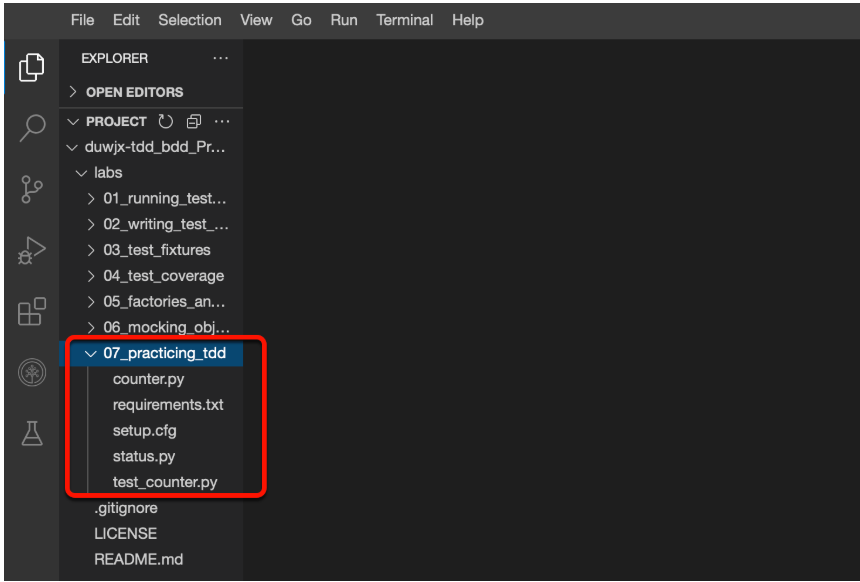

The test cases you will add to are in `test_counter.py`, and the code you will add is in `counter.py`. 

These are the only two files you will work with.

# Requirements

Assume you have been asked to create a web service that can keep track of multiple counters. The web service has the following requirements:
* The API must be RESTful.
* The endpoint must be called `/counters`.
* When creating a counter, you must specify the name in the path.
* Duplicate names must return a conflict error code.
* The service must be able to update a counter by name.
* The service must be able to get a counter’s current value.
* The service must be able to delete a counter.

The last three requirements have not been implemented. You have been asked to implement them using TDD principles by writing the test cases first, and then writing the code to make the test cases pass.

# REST API Guidelines Review

There are guidelines for creating REST APIs that enable you to write the test cases for this lab:

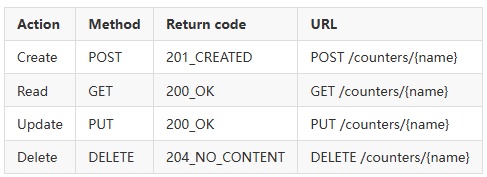

Following these guidelines, you can make assumptions about how to call the web service and assert what it should return.

# Step 1: Write a test for update a counter

* You will start by implementing a test case to test updating a counter. 
* Following REST API guidelines, an update uses a `PUT` request and returns code `200_OK` if successful. 
* Create a counter and then update it.

## Your Task

In `test_counter.py`, create a test called `test_update_a_counter(self)`. 

It should implement the following steps:
1. Make a call to Create a counter.
2. Ensure that it returned a successful return code.
3. Check the counter value as a baseline.
4. Make a call to Update the counter that you just created.
5. Ensure that it returned a successful return code.
6. Check that the counter value is one more than the baseline you measured in **step 3**.

> **Hint:** Use a different counter name for each test so that one test does not affect the others

## Solution

In [1]:
def test_update_a_counter(self):
    """It should increment the counter"""
    result = self.client.post("/counters/baz")
    self.assertEqual(result.status_code, status.HTTP_201_CREATED)
    data = result.get_json()
    baseline = data["baz"]
    # Update the counter
    result = self.client.put("/counters/baz")
    self.assertEqual(result.status_code, status.HTTP_200_OK)
    data = result.get_json()
    self.assertEqual(data["baz"], baseline + 1)

## Run the Tests

Run `nosetests` to see the new test is failing.

You may need to scroll up in the terminal to see all the results.

The results should look like this:

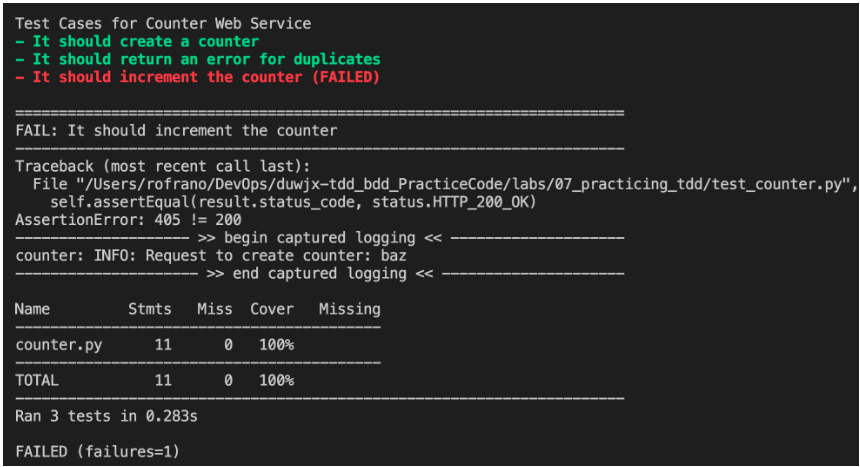

> * *Notice that the failure is **`AssertionError: 405 != 200`**. A `405` is `405_METHOD_NOT_ALLOWED`, indicating that Flask found a route called `/counters/<name>` but it does not allow a `PUT` method. This is because you haven’t written that code yet.* 

# Step 2: Implement update a counter

* Now you write the code to make the test pass. 
* If you're familiar with Flask, note that all of the routes for the counter service are the same; only the method changes.
* To start, you will implement a function to update the counter.
* Per REST API guidelines, an update uses a `PUT` request and returns a `200_OK` code if successful.
* Create a function that updates the counter that matches the specified name.

## Your Task

In `counter.py`, create a function called `update_counter(name)`. 

It should implement the following steps:
1. Create a route for method `PUT` on endpoint `/counters/<name>`.
2. Create a function to implement that route.
3. Increment the counter by `1`.
4. Return the new counter and a `200_OK` return code.

## Solution

```
@app.route("/counters/<name>", methods=["PUT"])
def update_counter(name):
    """Update a counter"""
    app.logger.info(f"Request to update counter: {name}")

    global COUNTERS
    COUNTERS[name] += 1

    app.logger.info(f"Counter: {name} is now {COUNTERS[name]}")
    return { name: COUNTERS[name] }, status.HTTP_200_OK
```

> * *Notice that this code does not provide any error handling.*
> * ***What if the counter doesn’t exist?***
> * *You would need a new test case and then more code to check that the counter exists before incrementing it.*

## Run the Tests

Run `nosetests` and make sure that the test cases pass.

The results should look like this:

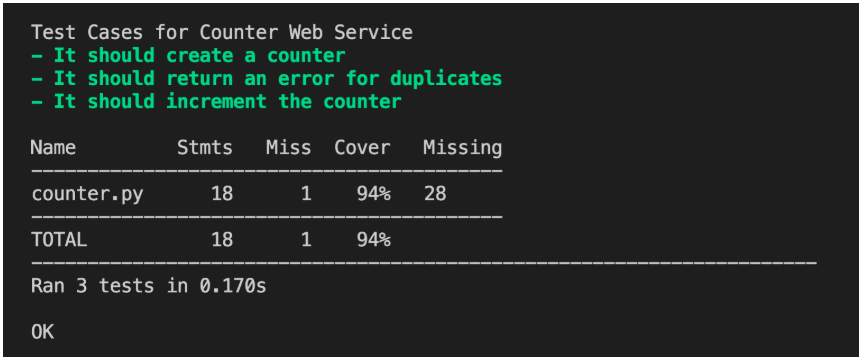

# Step 3: Write a test for read a counter

* Next, you will write a test case to read a counter. 
* Following REST API guidelines, a read uses a `GET` request and returns a `200_OK` code if successful.
* Create a counter and then read it.

## Your Task

In `test_counter.py`, create a test called `est_read_a_counter(self)`. 

It should implement the following steps:
1. Make a call to create a counter.
2. Ensure that it returned a successful return code.
3. Make a call to read the counter you just created.
4. Ensure that it returned a successful return code.
5. Check that the counter value returned is 0.

> ***Hint:** Use a different counter name for each test so that one test does not affect the others.*

## Solution

```
    def test_read_a_counter(self):
        """It should read the counter"""
        result = self.client.post("/counters/bin")
        self.assertEqual(result.status_code, status.HTTP_201_CREATED)
        # Read the counter
        result = self.client.get("/counters/bin")
        self.assertEqual(result.status_code, status.HTTP_200_OK)
        data = result.get_json()
        self.assertEqual(data["bin"], 0)
```

## Run the Tests

Run `nosetests` to see that the new test is failing.

The results should look like this:

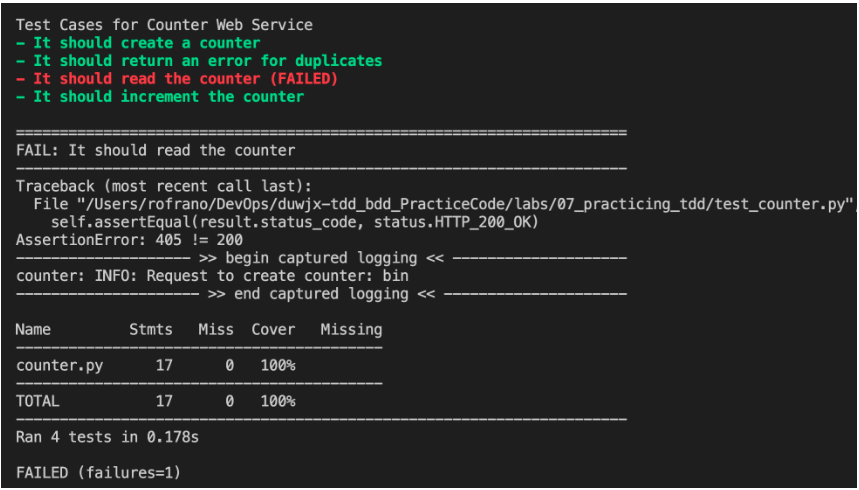

> * *Notice again, that the failure is `AssertionError: 405 != 200`.*
> * *A `405` is `405_METHOD_NOT_ALLOWED`, indicating that Flask found a route called `/counters/<name>` but it does not allow a `GET` method. This is because you haven’t written that code yet.*

# Step 4: Implement read a counter

* Once again, it’s time to write code to make a test pass.
* You will implement the code for read a counter.
* Per REST API guidelines, a read uses a `GET` request and returns a `200_OK` code if successful.
* Create a function that returns the counter that matches the specified name.

## Your Task

In `counter.py`, create a function called `read_counter(name)`. 

It should implement the following steps:
* Create a route for method `GET` on endpoint `/counters/<name>`.
* Create a function to implement that route.
* Get the current value of the counter.
* Return the counter and a `200_OK` return code.

## Solution

```
@app.route("/counters/<name>", methods=["GET"])
def read_counter(name):
    """Read a counter"""
    app.logger.info(f"Request to read counter: {name}")

    counter = COUNTERS[name]

    app.logger.info(f"Counter: {name} is {counter}")
    return { name: counter }, status.HTTP_200_OK
```

> * *Notice that the code does not provide any error handling.*
> * *Again, if the counter didn’t exist, you would need a new test case and then more code to check that the counter exists before returning it.*

## Run the Tests

Run `nosetests` and make sure that the test cases pass.

The results should look like this:

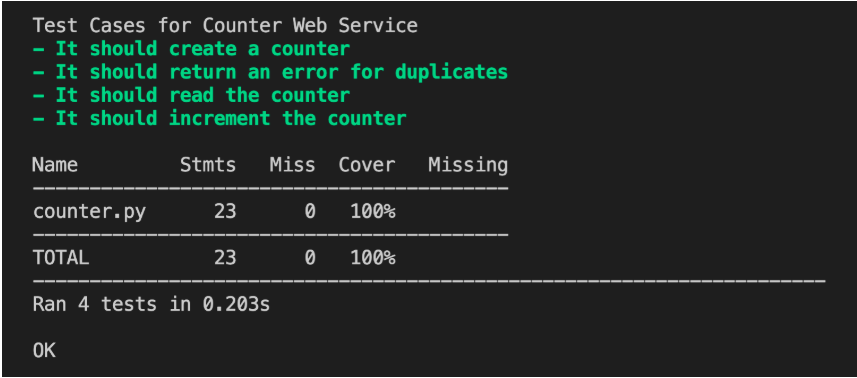

# Step 5: Write a test for delete a counter

* Now you will write a test case to delete a counter. 
* Per REST API guidelines, a read uses a `DELETE` request and returns a `204_NO_CONTENT` code if successful.
* Create a function that deletes the counter that matches the specified name.

## Your Task

In `test_counter.py`, create a function called `test_delete_a_counter(self)`. 

It should implement the following steps:
1. Make a call to Create a counter.
2. Ensure that it returned a successful return code.
3. Make a call to delete the counter you just created.
4. Ensure that it returned a successful return code.

> ***Hint:** Use a different counter name for each test so that one test does not affect the others*

## Solution

```
    def test_delete_a_counter(self):
        """It should delete the counter"""
        result = self.client.post("/counters/fob")
        self.assertEqual(result.status_code, status.HTTP_201_CREATED)
        # Delete the counter
        result = self.client.delete("/counters/fob")
        self.assertEqual(result.status_code, status.HTTP_204_NO_CONTENT)
```

## Run the Tests

Run `nosetests` to see the new test is failing.

The results should look like this:

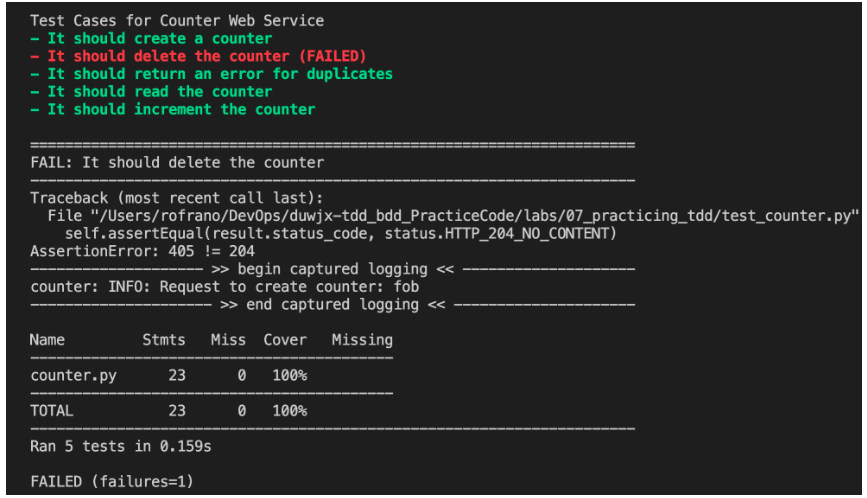

> * Notice again, that the failure is `AssertionError: 405 != 204`.
> * A `405` is `405_METHOD_NOT_ALLOWED`, indicating that Flask found a route called `/counters/<name>` but it does not allow a `DELETE` method.
> * This is because you haven’t written that code yet.

# Step 6: Implement delete a counter

* In this last step, you will again write code to make a test pass. 
* This time, you will implement the code to delete a counter. 
* Per REST API guidelines, a delete uses a `DELETE` request and returns a `204_NO_CONTENT` code if successful.

## Your Task

In `counter.py`, create a function called `delete_counter(name)`. 

It should implement the following steps:
1. Create a route for method `DELETE` on endpoint `/counters/<name>`.
2. Create a function to implement that route.
3. Delete the counter that matches the name.
4. Return the counter and a `204_NO_CONTENT` return code.

## Solution

```
@app.route("/counters/<name>", methods=["DELETE"])
def delete_counter(name):
    """Delete a counter"""
    app.logger.info(f"Request to delete counter: {name}")

    del(COUNTERS[name])

    app.logger.info(f"Counter: {name} has been deleted")
    return '', status.HTTP_204_NO_CONTENT
```

> * *Notice that it does not provide any error handling.*
> * *Again, if the counter didn’t exist, you would need a new test case and then more code to check that the counter exists before deleting it.*

## Run the Tests

Run `nosetests` and make sure the test cases pass.

The results should look like this:

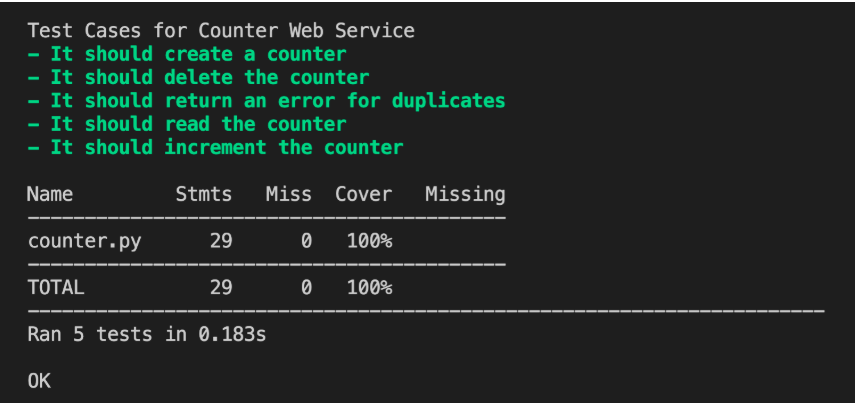